# Bias-variance trade-off with Python example

This post aims to present the bias-variance trade-off through a practical example in Python.

The bias-variance trade-off refers to the balance between two competing properties of machine learning models.

The goal of supervised machine learning problems is to find the mathematical representation (f) that explains the relationship between input predictors (x) and an observed outcome (y):

$$ y = f(x) + \varepsilon $$

Where $ \varepsilon $ indicates noise in the data.

As an example, we create our synthetic x and y by choosing a sine wave as relationship between the two:

$$ y = sin(\pi x) + \varepsilon $$

where $ \{ x \in R | 0 < x < 2 \} $

We also assume a normally distributed noise, with mean=0 and variance=1.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from random import randint
from math import pi as PI
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [ ]:
plt.style.use('ggplot')

# for reproducibility across different runs, one may set a seed as follows:
# np.random.seed(42)

# number of observations
NUM_OBS = 500

# predictors
x = np.linspace(0, 2, num = NUM_OBS)
# noise
eps = np.random.normal(0, 1, NUM_OBS)
# outcome
y = np.sin(PI*x) + eps

fig = plt.figure(figsize=(7,7))
ax = plt.axes()
ax.set_title('y = sin(πx) + Ɛ')
ax.set_xlabel("x")
ax.set_ylabel("y")

ax.scatter(x, y, c = 'k')
plt.show()

In a real-world scenario, we would not know the relationship between predictors and outcome.

Given a dataset, our task is to find suitable candidate models and choose the one that better fits our information.

To this aim, we split our data in, at least, two distinct sets:

1. Train set: the portion of data to fit the model.
2. Test set: the portion of data to evaluate the model performances.

As the test set contains data not seen before by the model, assessing the performances on that set provides a better estimate of how the model would perform on real-world, unseen data.

We split our original data into train (80%) and test (20%) set as follows:

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                    test_size = 0.2,
                                                    random_state = 1)

fig = plt.figure(figsize = (7,7))
ax = plt.axes()
ax.set_title('y = sin(πx) + Ɛ')
ax.set_xlabel("x")
ax.set_ylabel("y")

ax.scatter(x_train, y_train, label = "Train set")
ax.scatter(x_test, y_test, label = "Test set")
ax.legend()
plt.show()

Now we want to train some models on the train set and assess their performances on the test set.

In particular, we want to minimize the error that the model makes when predicting the outcome from the predictors; such error is typically a measure of distance between the predicted outcome (y_predicted) and the observed outcome (y_observed), for all our observations (n).

In this case, we can use the Mean Square Error (MSE), defined as follows:

$$ MSE = \frac{1}{n}\sum^{n}_{i=0}\big( y_{predicted}[i] - y_{observed}[i]\big)^2  $$

Moreover, we could prove that this error can be decomposed into the sum of thress quantities:

$$ MSE = Variance + Bias^2 + IrreducibleError $$

Any model, however good, is an approximation of complex relationships between data, therefore the so called irreducible error is a component that cannot be avoided.

From the formula, it seems that a good model should minimize both bias and variance: let us define those terms.

### Bias

Bias takes into account the difference between the model prediction and the real outcome.

It depends mainly on the model we choose to solve our problem, and how the model assumptions can suitably interpret the relationship between predictors and outcome.

By observing our train set plot, we notice a non-linear trend. If we chose to model the relationship between x and y with a linear regression, the model assumptions would clearly fail to explain our f, which we know to be non-linear. In this case, we would obtain a model with high bias.

We can empirically assess that a model suffers from high bias because it shows a high error on the train set. Or, in other words, a low training performance: this condition goes under the name of underfitting.

**High bias**:
- Model assumptions fail to explain the relationship between predictors and outcome.
- Involves “simpler” (less flexible) models, such as linear regression.
- Leads to underfitting (poor train set performances).

### Variance

Variance measures how different choices of the train sets would affect the the model parameters.

When we train a machine learning model, we want that, by selecting a slightly different train set, the function would not change significantly. Otherwise, we would have obtained a model unable to generalize in front of small variations in the input data: this goes under the name of overfitting.

Intuitively, models with fewer assumptions do not suffer from high variance, as they do not change in front of small variations in the train set. Therefore, high variance is a problem that affects more flexible models, such as decision trees.

As the model is complex enough to overfit on a train set, we would expect high train performances (or low training error), but also poor test performances, as the model would require significant changes in the parameters to explain small variations in the data.

**High variance**:
- Involves more “complex” models (more flexible), such as decision trees.
- Leads to overfitting (poor test set performances).

The concept is summarized by this image:

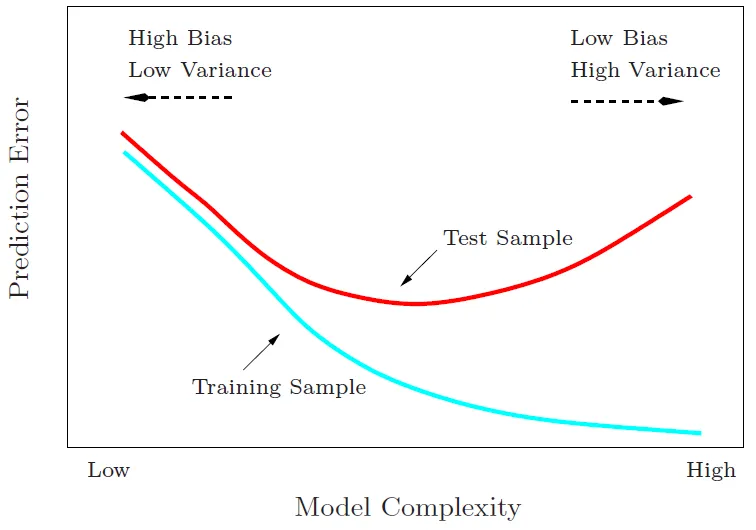

In order to illustrate these concepts in our example, we fit multiple polynomial models with increasing polynomial degree on the train set, and then observe the trend of the MSE over the increasing model complexity:

In [ ]:
import warnings
warnings.filterwarnings('ignore')

# number of polynomial models to investigate
NUM_MODELS = 25

colors = iter(plt.cm.rainbow(np.linspace(0, 1, NUM_MODELS)))

fig, axs = plt.subplots(2, 2, figsize = (20,20))

axs[0, 0].set_title('Train Set Predictions')
axs[1, 0].set_title('Test Set Predictions')
axs[0, 1].set_title('Train Set MSE')
axs[1, 1].set_title('Test Set MSE')

axs[0, 0].set_xlabel("x train")
axs[0, 0].set_ylabel("y")
axs[0, 0].set_ylim([-3, 3])

axs[1, 0].set_xlabel("x test")
axs[1, 0].set_ylabel("y")
axs[1, 0].set_ylim([-3, 3])

axs[0, 1].set_xlabel("polynomial degree")
axs[0, 1].set_ylabel("train MSE")

axs[1, 1].set_xlabel("polynomial degree")
axs[1, 1].set_ylabel("test MSE")

axs[0,0].scatter(x_train, y_train, c = 'k', label = "y train")
axs[1,0].scatter(x_test, y_test, c = 'k', label = "y test")

train_mse = []
test_mse = []

for k in range(0, NUM_MODELS):

  c = next(colors)

  # k-th degree polynomial coefficients
  fit_coeff = np.polyfit(x_train, y_train, deg = k+1)

  # train and test k-th degree polynomial fit
  y_train_pred = np.polyval(fit_coeff, x_train)
  y_test_pred = np.polyval(fit_coeff, x_test)

  # plot train and test k-th degree polynomial fit
  axs[0,0].scatter(x_train,
                   y_train_pred,
                   color = c,
                   label = "deg: {}".format(k+1))
  
  axs[1,0].scatter(x_test,
                   y_test_pred,
                   color = c,
                   label = "deg: {}".format(k+1))

  # train and test MSE of k-th degree polynomial fit 
  iter_train_mse = mean_squared_error(y_train_pred, y_train)
  iter_test_mse = mean_squared_error(y_test_pred, y_test)

  train_mse.append(iter_train_mse)
  test_mse.append(iter_test_mse)

  # plot train and test MSE of k-th degree polynomial fit
  axs[0,1].plot(k+1,
                iter_train_mse,
                color = c,
                label = "deg: {}".format(k+1),
                marker = 'D',
                markersize = 12,
                markeredgecolor = 'black',
                markeredgewidth = 3)
  
  axs[1,1].plot(k+1,
                iter_test_mse,
                color = c,
                label = "deg: {}".format(k+1),
                marker = 'D',
                markersize = 12,
                markeredgecolor = 'black',
                markeredgewidth = 3)

# plot dashed line to interpolate MSE measures
axs[0,1].plot(range(1,NUM_MODELS+1), train_mse, 'k--')
axs[1,1].plot(range(1,NUM_MODELS+1), test_mse, 'k--')

# draw legends
axs[0,1].legend(loc = "upper right",
                bbox_to_anchor = (1.2, 1.01),
                prop = {'size': 12})
axs[1,1].legend(loc = "upper right",
                bbox_to_anchor = (1.2, 1.01),
                prop = {'size': 12})
plt.show()
warnings.resetwarnings()

If we look at the MSE plots over the polynomial degree (model complexity) from left to right, the increasing complexity of the models leads to a decrease in the train error (lower bias), but also a significant increase in the test error (high variance).

On the other hand, we also notice that the decreasing complexity of the models results in a poor train set performance (high bias) as well as better generalization on the test set (low variance).

The best fit is represented by the polynomial degree that minimizes the test error:

In [ ]:
print("Best fit polynomial degree: ", test_mse.index(min(test_mse)))

In conclusion, the best fit shows two characteristics: it fits well the train set (low train set error) and it generalizes well on unseen data (low test set error), as it minimizes both variance and bias. In our example, models with higher error presented either high variance or high bias. Hence, the name bias-variance trade-off.

-----------------

# Curated Articles - Model Evaluation, Cross-Validation and Bootstrapping

Please find below some curated external links to articles about linear regression, regularization, Cross-Validation, and Bootsrap Sampling.

1. [Assumptions of Linear Regression](https://www.jmp.com/en_us/statistics-knowledge-portal/what-is-regression/simple-linear-regression-assumptions.html): This article talks about certain assumptions that we make before applying linear regression with the help of visual analysis.
2. [Regularization](https://analyticsindiamag.com/regularization-in-machine-learning-a-detailed-guide/): This article explains the concept of regularization and its types. Regularization is used to avoid overfitting by adding some coefficients in the loss function equation.
3. [Cross-Validation](https://www.mygreatlearning.com/blog/cross-validation/): This article explains the concept of cross-validation, its types, and why it is used in machine learning. It discusses the steps taken while applying cross-validation techniques.
4. [Bootstrap Sampling](https://machinelearningmastery.com/a-gentle-introduction-to-the-bootstrap-method/#:~:text=The%20bootstrap%20method%20is%20a,sampling%20a%20dataset%20with%20replacement.&text=It%20is%20used%20in%20applied,included%20in%20the%20training%20data.): This article talks about the bootstrap sampling method in machine learning, and why we need it, with the implementation in Python.
Happy Learning!

-----------------